In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from mlxtend.data import loadlocal_mnist
(X_train,Y_train)=([],[])
(X_test,Y_test)=([],[])

Using TensorFlow backend.


In [2]:
path=os.getcwd()+"/train_data/"
(x2_train, y2_train) = loadlocal_mnist(
        images_path=os.getcwd()+'/emnist-letters-train-images-idx3-ubyte', 
        labels_path=os.getcwd()+'/emnist-letters-train-labels-idx1-ubyte')
(x2_test, y2_test) = loadlocal_mnist(
        images_path=os.getcwd()+'/emnist-letters-test-images-idx3-ubyte', 
        labels_path=os.getcwd()+'/emnist-letters-test-labels-idx1-ubyte')
file=sorted(os.listdir(path))
print(file[195])
file.insert(0," ")
for t in range(1,len(file),1):
    loc=path+file[t]
    res=cv2.imread(loc,0)
    (h,w)=res.shape[:2]
    centre=(w/2,h/2)
    M=cv2.getRotationMatrix2D(centre,270,1)
    res=cv2.warpAffine(res, M, (h,w))
    res = cv2.bitwise_not(res)
    img=cv2.resize(cv2.flip(res,1),(28,28),interpolation = cv2.INTER_AREA)
    if file[t][0]==file[t-1][0] :
        if t-a>=30 :
            X_train.append(img)
            Y_train.append(ord(label)-65)
        else :
            X_test.append(img)
            Y_test.append(ord(label)-65)
    else :
        a=t
        label=file[t][0]
        X_train.append(img)
        Y_train.append(ord(label)-65)

A96.png


In [3]:
# x2_train=np.asarray(x2_train)
# x2_test=np.asarray(x2_test)
# y2_test=np.asarray(y2_test.view(np.uint8))
# y2_train=np.asarray(y2_train.view(np.uint8))
# x2_train=x2_train.reshape(x2_train.shape[0],28,28,1)
#np.rot90(x2_train,k=1,axes=(2,1))
# x2_test=x2_test.reshape(x2_test.shape[0],28,28,1)
#np.rot90(x2_test,k=1,axes=(2,1))
x1_train=np.asarray(X_train)
x1_test=np.asarray(X_test)
y_train=np.asarray(Y_train)
y_test=np.asarray(Y_test)
x_train=x1_train.reshape(x1_train.shape[0],28,28,1)
x_test=x1_test.reshape(x1_test.shape[0],28,28,1)
# x_train=np.concatenate((x1_train, x2_train), axis=0)
# y_train=np.concatenate((y1_train-1, y2_train-1), axis=0)
# x_test=np.concatenate((x1_test, x2_test), axis=0)
# y_test=np.concatenate((y1_test-1, y2_test-1), axis=0)

In [4]:
#x_train=x_train.reshape(x_train.shape,140,140,1)
#x_test=x_test.reshape(x_test.shape,140,140,1)
print(x_train.shape)

(4493, 28, 28, 1)


In [5]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(26, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
hist = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=10, batch_size=20)

Epoch 1/10
225/225 [==============================] - 4s 18ms/step - loss: 1.0167 - accuracy: 0.9390 - val_loss: 1.0394e-04 - val_accuracy: 1.0000
Epoch 2/10
225/225 [==============================] - 4s 18ms/step - loss: 6.8720e-05 - accuracy: 1.0000 - val_loss: 4.0494e-05 - val_accuracy: 1.0000
Epoch 3/10
225/225 [==============================] - 4s 18ms/step - loss: 3.1882e-05 - accuracy: 1.0000 - val_loss: 2.1064e-05 - val_accuracy: 1.0000
Epoch 4/10
225/225 [==============================] - 4s 19ms/step - loss: 1.7739e-05 - accuracy: 1.0000 - val_loss: 1.2076e-05 - val_accuracy: 1.0000
Epoch 5/10
225/225 [==============================] - 4s 19ms/step - loss: 9.4301e-06 - accuracy: 1.0000 - val_loss: 6.3433e-06 - val_accuracy: 1.0000
Epoch 6/10
225/225 [==============================] - 4s 20ms/step - loss: 5.0126e-06 - accuracy: 1.0000 - val_loss: 3.7889e-06 - val_accuracy: 1.0000
Epoch 7/10
225/225 [==============================] - 4s 19ms/step - loss: 3.0859e-06 - accuracy: 

In [9]:
predictions = model.predict(x_train[1400:1450])
predictions
print([chr(item+65) for item in np.argmax(predictions, axis=1)])
print([chr(item+65) for item in y_train[1400:1450]])

['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']


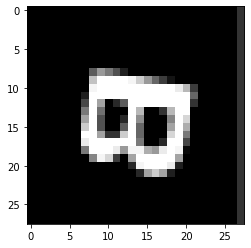

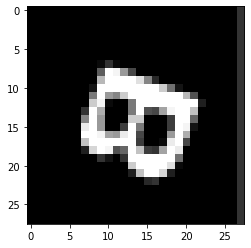

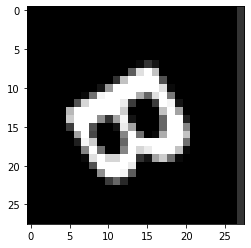

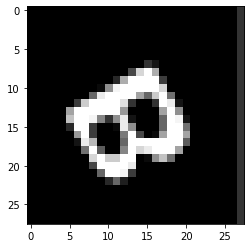

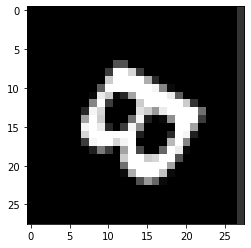

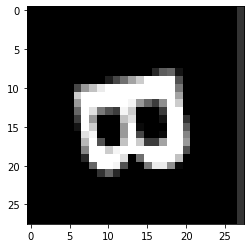

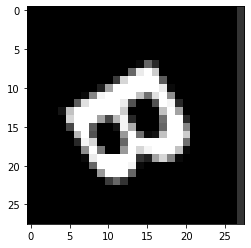

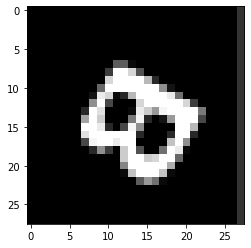

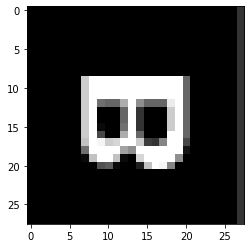

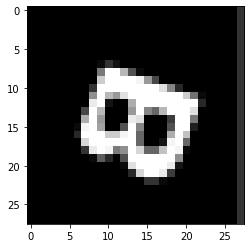

In [10]:
for i in range(200,210):   
    image = x_train[i]   
    res = np.array(image, dtype='float')
    
    pixels = res.reshape((28,28))  
    plt.imshow(pixels, cmap='gray')   
    plt.show()
t=0

In [23]:
def function():
    path=os.getcwd()+"/task/images/"
    file=os.listdir(path)
    s='a.png'  
    loc=path+file[t]
    img=cv2.imread(loc,1)
    img=img[5:(img.shape[0]-5), 5:(img.shape[1]-5)]
    plt.imshow(img)
    plt.show()
    dilation=np.zeros((img.shape[0],img.shape[1]))
#     plt.imshow(dilation, cmap='gray')
#     plt.show()
    og=np.zeros((img.shape[0],img.shape[1]))
#     plt.imshow(og, cmap='gray')
#     plt.show()
    color=[img[0,0,0],img[0,0,1],img[0,0,2]]
    img[np.where((img==color).all(axis=2))] = [255,255,255]
#     plt.imshow(img)
#     plt.show()
    og = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     plt.imshow(og, cmap='gray')
#     plt.show()
    ret,og = cv2.threshold(og,254,255,cv2.THRESH_BINARY)
#     plt.imshow(og, cmap='gray')
#     plt.show()
    kernel = np.ones((5,5),np.uint8)
    dilation =cv2.dilate(og,kernel,iterations = 2)
#     plt.imshow(dilation, cmap='gray')
#     plt.show()
    dst=cv2.filter2D(dilation,-1,kernel)
#     plt.imshow(dst, cmap='gray')
#     plt.show()
    inv_og = cv2.bitwise_not(dst)
#     plt.imshow(inv_og, cmap='gray')
#     plt.show()
    isim=False

    sm=np.sum(inv_og, axis=0)
    for i in range(0,img.shape[1]):
        if sm[i]>0 and (not isim) :
            ini=i-10
            isim=True
        elif sm[i]==0 and isim:
            fi=i+10
            isim=False
            image=dst[:,ini:fi]
            mod=(int)(abs((image.shape[0]-image.shape[1])/2))
            if image.shape[1]<image.shape[0]:
                pdimage= cv2.copyMakeBorder(image,0,0,mod,mod,cv2.BORDER_REPLICATE)
            else:
                pdimage= cv2.copyMakeBorder(image,mod,mod,0,0,cv2.BORDER_REPLICATE)
#             plt.imshow(pdimage, cmap='gray')
#             plt.show()
            res=cv2.resize(pdimage,(140,140),interpolation = cv2.INTER_AREA)
#             plt.imshow(res, cmap='gray')
            ret,res = cv2.threshold(res,127,255,cv2.THRESH_BINARY)
#             plt.imshow(res, cmap='gray')
#             plt.show()
            res = cv2.bitwise_not(res)
            kernel = np.ones((3,3),np.uint8)
            erosion = cv2.erode(res,kernel,iterations = 2)
            (h,w)=res.shape[:2]
            centre=(w/2,h/2)
            M=cv2.getRotationMatrix2D(centre,270,1)
            res=cv2.warpAffine(res, M, (h,w))
            cv2.imwrite(os.path.join(os.getcwd()+'/task/im',s),cv2.flip(res,1))
#             plt.imshow(cv2.flip(res,1), cmap='gray')
#             plt.show()
            s='a'+s
                    
    tic = tm.perf_counter()
    toc = tm.perf_counter()

In [24]:
t=0

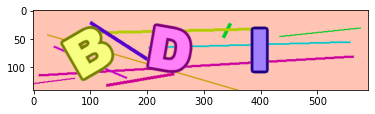

['B', 'D', 'I']


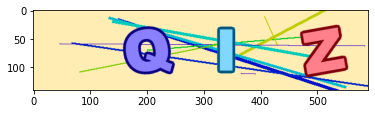

['Q', 'I', 'Z']


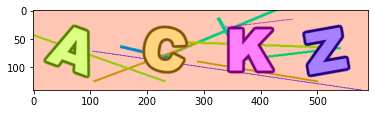

['A', 'Q', 'X', 'Z']


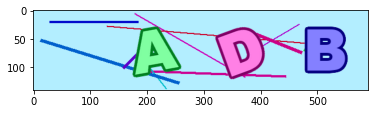

['X', 'D', 'B']


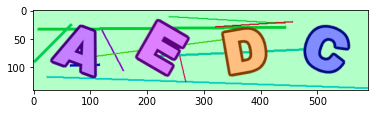

['A', 'E', 'D', 'C']


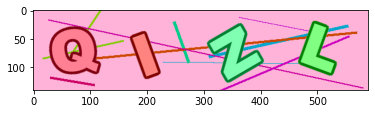

['Q', 'I', 'Z', 'L']


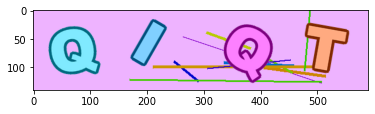

['Q', 'I', 'Q', 'T']


In [25]:
while t>=0 and t<=6:
    import time as tm
    kernel=np.ones((5,5),np.uint(8))
    function()
    D_test=[]
    pathe=os.getcwd()+"/task/im/"
    filee=sorted(os.listdir(pathe))
    for i in range(0,len(filee),1):
        loc=pathe+filee[i]
        res=cv2.imread(loc,0)
        img=cv2.resize(res,(28,28),interpolation = cv2.INTER_AREA)
        D_test.append(img)
    d_test=np.asarray(D_test)
    d_test=d_test.reshape(len(D_test),28,28,1)
    predictions = model.predict(d_test)
    predictions#Print our predicitons as number labels for the first 4 images
    print([chr(item+65) for item in np.argmax(predictions, axis=1)])
    for i in range(0,len(D_test),1):   
        image = d_test[i]   
        image = np.array(image, dtype='float')
        pixels = image.reshape((28,28))  
#         plt.imshow(pixels, cmap='gray')
#         plt.show()
    for i in range(0,len(filee),1):
        os.unlink(pathe+filee[i])
    t=t+1